How many days do you wish to search? For one year, it's 365:   30
Output File already exists. Deleting...
Creating new file for Bitcoin as png
Output File already exists. Deleting...
Creating new file for Litecoin as png
Output File already exists. Deleting...
Creating new file for Ethereum as png
         Time        Date      bitcoin   litecoin    ethereum
0    00:01:18  2020-04-15  6860.178536  41.197744  157.059818
1    01:03:56  2020-04-15  6846.820027  40.909630  157.756152
2    02:04:04  2020-04-15  6861.921804  41.042689  159.989744
3    03:02:37  2020-04-15  6899.802111  41.392300  160.287975
4    04:03:57  2020-04-15  6906.417425  41.556407  159.949442
..        ...         ...          ...        ...         ...
716  20:09:25  2020-05-14  9617.886804  43.791454  202.170793
717  21:09:05  2020-05-14  9639.153548  43.724841  203.081619
718  22:04:43  2020-05-14  9742.916915  43.899431  203.313454
719  23:08:38  2020-05-14  9718.067820  44.094281  203.211247
720  23:40:49  2020

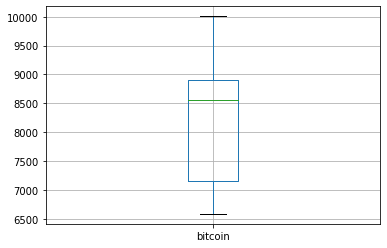

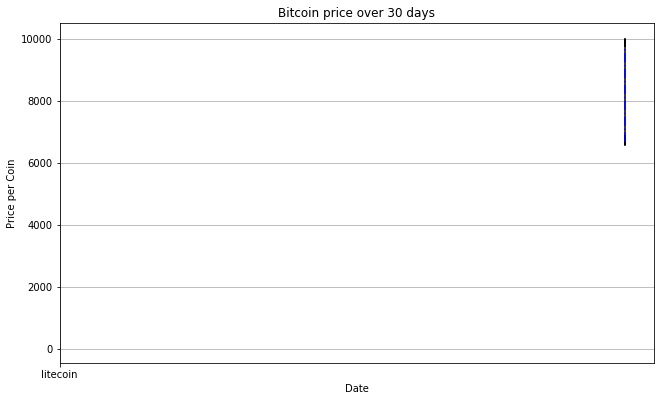

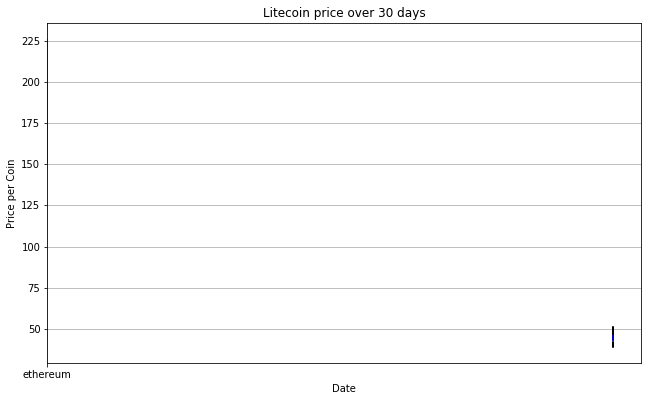

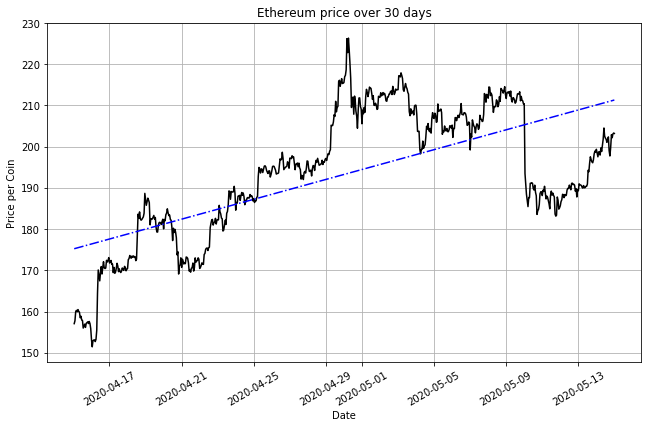

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import requests, json, datetime, sys, os

def dataFigure(date_time, value, date_time_seconds, time_frame, key):
    plt.figure(figsize=(9,6))
    plt.xticks(rotation = 30)
    plt.grid()
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.plot(date_time, value, color = 'black')
    plt.title(f"{key.capitalize()} price over {time_frame} days")
    plt.xlabel('Date')
    plt.ylabel('Price per Coin')
    regression = []
    (slope, intercept, rvalue, pvalue, stderr) = linregress(date_time_seconds, value)
    regress_values = []
    for unix_translate in date_time_seconds:
        regress_values.append(unix_translate * slope + intercept)
    plt.plot(date_time, regress_values,'-.', color = 'Blue')
    try:
        os.remove(f'{key.capitalize()}.png')
        print('Output File already exists. Deleting...') 
        print(f'Creating new file for {key.capitalize()} as png')
        plt.savefig(f'{key.capitalize()}.png')
    except OSError:
        print(f'Creating save file for {key.capitalize()} as png')
        plt.savefig(f'{key.capitalize()}.png')
        pass
    
def checkCoinPrice(url, key):
    response = requests.get(url)
    data_construct = response.json()
    if data_construct == {"error":"Could not find coin with the given id"} or data_construct == {'error': 'invalid vs_currency'}:
        print("There was an issue with variables. Check work and try again.")
    date_time = []   
    value = []
    date_time_seconds = []    
    for row in data_construct['prices']:
        date_time.append(datetime.datetime.utcfromtimestamp(int(row[0]/1000)))
        value.append(row[1])
        date_time_seconds.append(int((row[0]/1000)))
        
    date = []
    time = []
    for convertline in date_time:
        split = str(convertline).split(' ')
        date.append(split[0])
        time.append(split[1])
    data_frame = pd.DataFrame(date, time)
    data_frame = data_frame.reset_index().rename(columns= {0: 'Date', 'index': 'Time'})
    data_frame[key] = value
    return(date_time, value, date_time_seconds, data_frame)
    
def dataFrameFinal(crypto_frame):
    crypto_frame.columns = map(str.capitalize, crypto_frame.columns)
    sum_of_coins = crypto_frame.describe()
    print(sum_of_coins)
    
def boxplot(data_frame, key):
    data_frame.boxplot(key)
    ##add simple moving average
    ##if you want to make changes, here is where you would.
    
def main():
    quick_keys = {1: 'bitcoin', 2: 'litecoin', 3: 'ethereum'}
    time_frame = int(input("How many days do you wish to search? For one year, it's 365:   "))
    listOfDicts = None
    for coin_type in range(3):
        key = quick_keys[coin_type + 1]
        url = f'https://api.coingecko.com/api/v3/coins/{key}/market_chart?vs_currency=usd&days={time_frame}'
        date_time, value, date_time_seconds, data_frame = checkCoinPrice(url, key)
        if listOfDicts is None:
            listOfDicts = data_frame
        else:
            listOfDicts[key] = data_frame[key]
        boxplot(data_frame, key)
        dataFigure(date_time, value, date_time_seconds, time_frame, key)
    print(listOfDicts)
    
    
    
main()